# IST 371 Machine Learning 

## Spring 2019

### Chapter 1 homework

#### Alex Lange, Aidan Polivka

For this chapter's homework, create a linear regression model, like we did in the chapter's example. For the assignment, use the provided `oregon-math-vs-lunch.csv` file, which lists the percent of all students who were proficient in mathematics (based on state testing) and the percentage of students recieving free or reduced-cost lunches, on a district-by-district basis, for the state of Oregon. The prompts below will guide you through the assignment.

#### Step 1. Imports and such

I'll give you the first step. The following code imports the Python libraries you should need for the assignment, and makes the Matplot figures show up in this notebook.

In [5]:
# Make sure you run this cell by hitting Shift+Enter before running your own code below!
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# The 'magic words' to make Matplot figures show up inside the notebook
%matplotlib inline

#### Step 2. Read the data into a Pandas dataframe

In the next cell, write code to read in the data from the `oregon-math-vs-lunch.csv` file and place it in a Pandas dataframe. Also, drop any rows that contain non-numeric data, since there are some districts where one or both of the columns are not reported, or are reported in a way that we can't easily deal with. Once you've got your dataframe, display it's contents -- on the final line of the cell, type just the name of the dataframe. When you run the cell, you should see your prepared data!

In [6]:
# read input data here, drop non-numeric rows, and then display the frame
oreg_infile = pd.read_csv("oregon-math-vs-lunch.csv", thousands=',')

#select only the rows with data in both columns by using the dropna method to remove columns with NaN data
oreg_infile = oreg_infile.dropna()

#display the updated table
oreg_infile


,District ID,Percent Proficient (Level 3 or 4),Percent Free Lunch
0,1894,34.1,26.07
1,1895,8.9,77.17
2,1896,17.6,57.89
3,1897,51.6,65.13
4,1898,19.0,47.26
5,1899,13.9,67.72
6,1900,45.2,38.79
7,1901,52.3,35.02
8,1922,61.5,19.25
9,1923,74.8,7.86


#### Step 3. Plot the data to see if there appears to be a correlation

In the cell below, create and display a scatter plot similar to the one on page 19 of your text. You don't have to worry about the arrows or text labels. Use the percentage of students recieving free or reduced cost lunches as the x-axis, and the percentage of students proficient in math as the y-axis. 

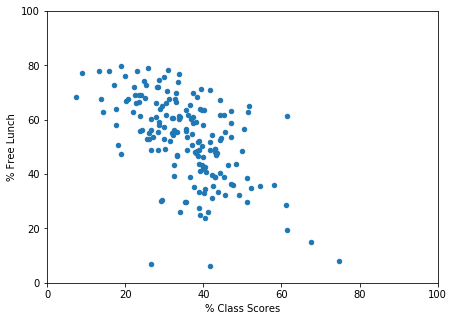

,District ID,% Class Scores,% Free Lunch
0,1894,34.1,26.07
1,1895,8.9,77.17
2,1896,17.6,57.89
3,1897,51.6,65.13
4,1898,19.0,47.26
5,1899,13.9,67.72
6,1900,45.2,38.79
7,1901,52.3,35.02
8,1922,61.5,19.25
9,1923,74.8,7.86


In [8]:
# create a scatter plot of the data here

#I'm going to rename the data so it's easier on my eyes via smaller names.
oreg_infile.rename(columns={'Percent Proficient (Level 3 or 4)':'% Class Scores'}, inplace =True)
oreg_infile.rename(columns={'Percent Free Lunch':'% Free Lunch'}, inplace =True)

#Plot out our data out on a scatter plot
oreg_infile.plot(kind='scatter', x="% Class Scores", y='% Free Lunch', figsize=(7,5))
#set the axis size of our plots
plt.axis([0,100,0,100])

#Show our Data onscreen
plt.show()
oreg_infile




#### Step 4. Train a linear regression model 

In the cell below, create and train a linear regression model on the school data, using the lunch data as the x values and the math test data as the y values. 

In [9]:
# select the 'Percent Free Lunch' column as the variable X
X = np.c_[oreg_infile["% Free Lunch"]]

# select the 'Percent Proficient (Level 3 or 4)' column as the variable Y
Y = np.c_[oreg_infile["% Class Scores"]]

# create and train a linear regression model using X and Y values

#Create the model
model = sklearn.linear_model.LinearRegression()

#Train the model. Run boy, run!
#            _( }
#   -=  _  <<  \
#      `.\__/`/\\
# -=     '--'\\  `
#      -=    //
####         \)
model.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Step 5. Display the model's line

In the cell below, create some X values that can be used to plot your linear regression model's prediction line, say, a range of values from 1 to 100. Then, find the Y values predicted by your model. Finally, plot your model's prediction line along with the scatter plot data from above. 

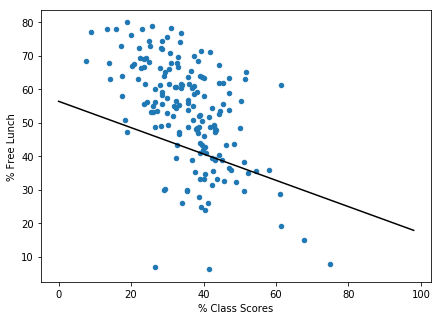

In [10]:
# create X values in the range 1 to 100
# use the model to calculate the Y values associated with the data you just made
X_Line_Values =np.c_[pd.DataFrame(list(range(0,100,2)))]
Y_Line_Values = model.predict(X_Line_Values)


#recreate the scatter plot of the original data
#Plot out our data
oreg_infile.plot(kind='scatter', x="% Class Scores", y='% Free Lunch', figsize=(7,5))

# plot your test X and Y values, from our linear regression model using a black line
plt.plot(X_Line_Values, Y_Line_Values, color = 'black')
# show the plot with our new line.
plt.show()

In [13]:
#I used this cell to attempt and text different variables.
Score_Prediction = [[85]]
print(model.predict(Score_Prediction))

[[22.97371446]]
